## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [91]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [92]:
!wget https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw03-plots/german_credit.csv

--2023-03-01 17:08:06--  https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw03-plots/german_credit.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv [following]
--2023-03-01 17:08:06--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275201 (269K) [text/plain]
Saving to: ‘german_credit.csv.3’

german_credit.csv.3 100%[===================>] 268.75K  --.-KB/s    in 0.04s   

2023-03-01 17:08:07 (7.47 MB/s) 

In [93]:
data = pd.read_csv('german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [94]:
data.isnull().any()

# Пропусков в данных нет. 
# Количественные: age, duration, amount
# Бинарные: telephone,	foreign_worker,	credit_ris
# Порядковые: employment_duration, installment_rate, present_residence, number_credits, people_liable, status, savings
# Категориальные: credit_history, purpose, 	personal_status_sex, other_debtors, property, other_installment_plans	, housing, job

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [95]:
data.groupby('purpose').agg({'amount' : ['mean']})

,amount
,mean
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [96]:
percentage1 = len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30])
percentage2 = len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[data['age'] > 40])
print(f'percentage of people aged less than 30 years rent a place: {percentage1 * 100}\npercentage of people aged more than 40 years rent a place: {percentage2 * 100}')

percentage of people aged less than 30 years rent a place: 66.66666666666666
percentage of people aged more than 40 years rent a place: 68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [97]:
print(data.number_credits.value_counts())
print("foreign_worker with number_credits > 3:\n",len(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '6'))]))

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64
foreign_worker with number_credits > 3:
 1


### Задание 6 (1 балл)

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

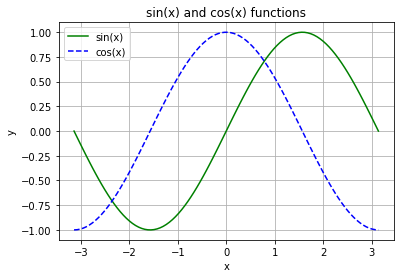

In [99]:
X = np.linspace(-np.pi, np.pi, 100,endpoint=True)
f_cos = np.cos(X)
f_sin = np.sin(X)



plt.plot(X, f_sin, label = 'sin(x)', color = 'g')
plt.plot(X, f_cos, label = 'cos(x)', linestyle='dashed', color = 'b')
plt.legend()

plt.title('sin(x) and cos(x) functions')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

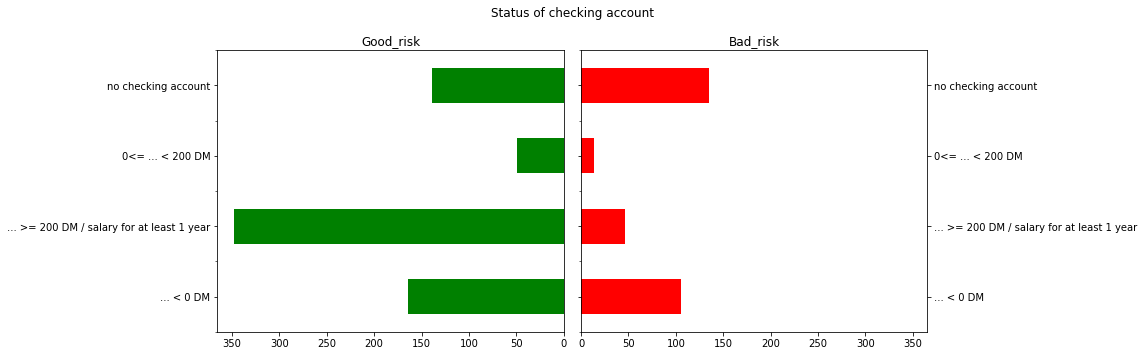

In [100]:
bad_risk = data[data['credit_risk'] == 'bad'].groupby(['status', 'credit_risk']).size().unstack()
good_risk = data[data['credit_risk'] == 'good'].groupby(['status', 'credit_risk']).size().unstack()

fig, ax = plt.subplots(figsize = (16, 5), ncols = 2, sharey = True)
fig.suptitle('Status of checking account')
ax[0].set_title('Good_risk')
ax[1].set_title('Bad_risk')

good_risk.plot(kind = 'barh', stacked = 'True', ax = ax[0], color = 'g', legend = False)
bad_risk.plot(kind = 'barh', stacked = 'True', ax = ax[1], color = 'r', legend = False)

ax[1].set_xlim(ax[0].get_xlim())
ax[0].invert_xaxis()

ax[0].set_ylabel(None)

ax[1].tick_params(axis = 'y', labelright = True, right = True)

plt.tight_layout()
plt.show()

### Задание 8  (0.5 балла)

In [101]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

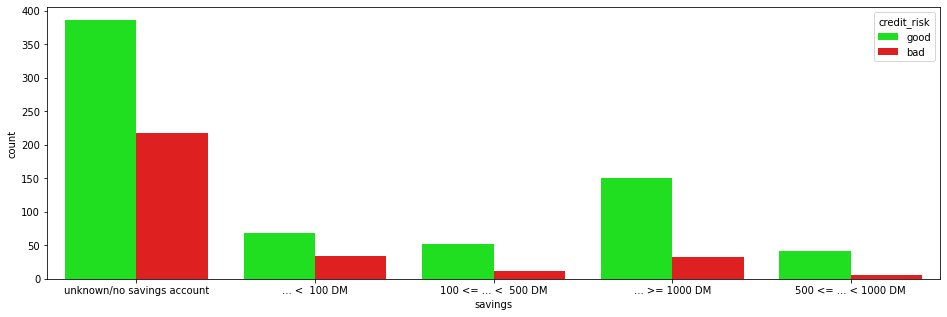

In [102]:
plt.figure(figsize=(16, 5))
sns.countplot(x = 'savings',
            hue='credit_risk',
            data=data,
            palette=['#00FF00',"#FF0000"])
# с точки зрения трудоемкости тяжело оценить пока, тк, например задание выше, было бы идентичным по сложности, если бы не было разделения на 2 графика и всех этих танцев с бубнами над осями,
# естественоо 5 строк написать легче, чем написать 18(хотя опять же какие строки), с точки зрения восприятия на первый взгляд seaborn приятнее, но времени seaborn занимает уж сильно много(0,753 cек на это задание против
# 0.357 с помощью матплотлиба в предыдущем)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<Figure size 1152x360 with 0 Axes>

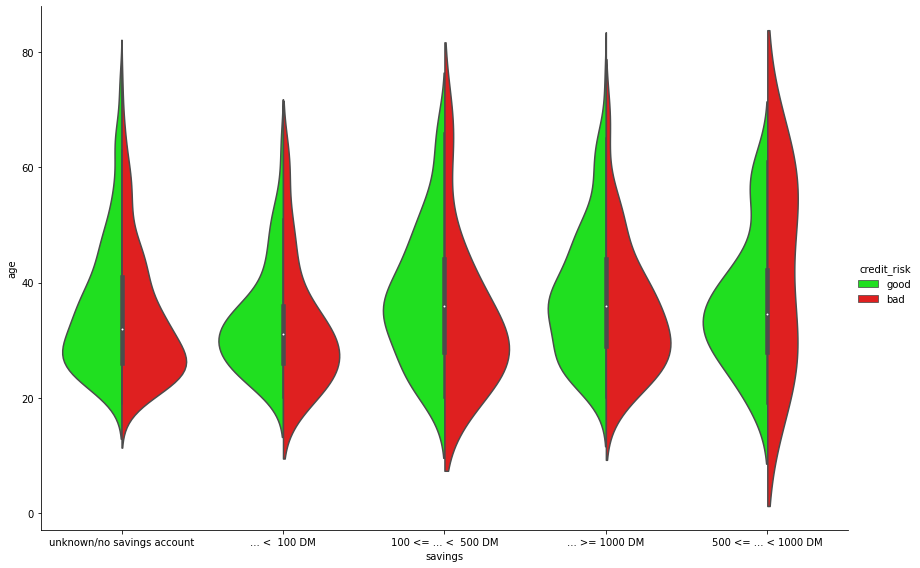

In [103]:
plt.figure(figsize=(16, 5))
sns.catplot(x='savings',
            y='age',
            hue='credit_risk',
            data=data,
            palette=['#00FF00',"#FF0000"],
            kind='violin',
            split=True,
            height=8, 
            aspect=1.5)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

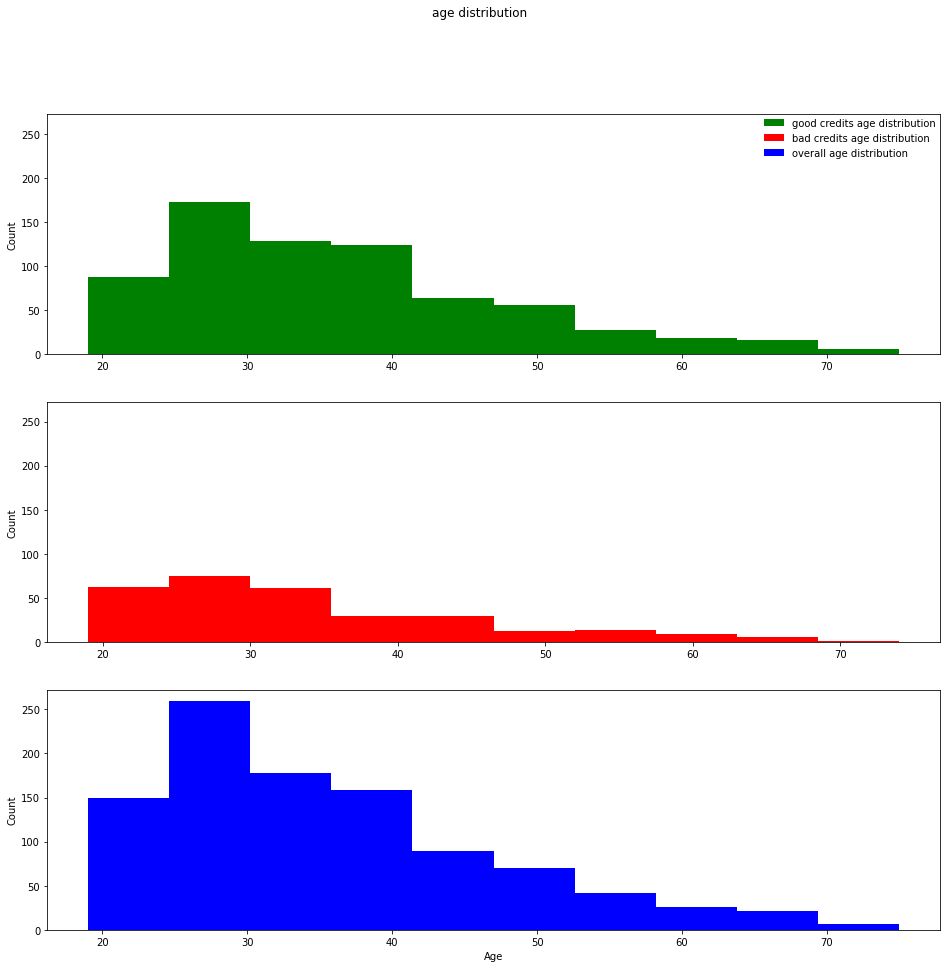

In [104]:
fig, (gr, br, ne) = plt.subplots(figsize = (16, 15), nrows = 3, sharey=True)
fig.suptitle('age distribution')

gr.hist(data[data['credit_risk'] == 'good']['age'], bins=10, color = 'g')
gr.set_ylabel('Count')

br.hist(data[data['credit_risk'] == 'bad']['age'], bins=10, color = 'r')
br.set_ylabel('Count')

ne.hist(data['age'], bins=10, color = 'b')
ne.set_xlabel('Age')
ne.set_ylabel('Count')

legend = fig.legend(labels=['good credits age distribution', 'bad credits age distribution', 'overall age distribution'],
                    bbox_to_anchor=(1, 1),
                    loc='upper right',
                    borderaxespad=0.0,
                    bbox_transform=gr.transAxes)

legend.get_frame().set_edgecolor('white')
legend.get_frame().set_alpha(0.8)
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none')

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

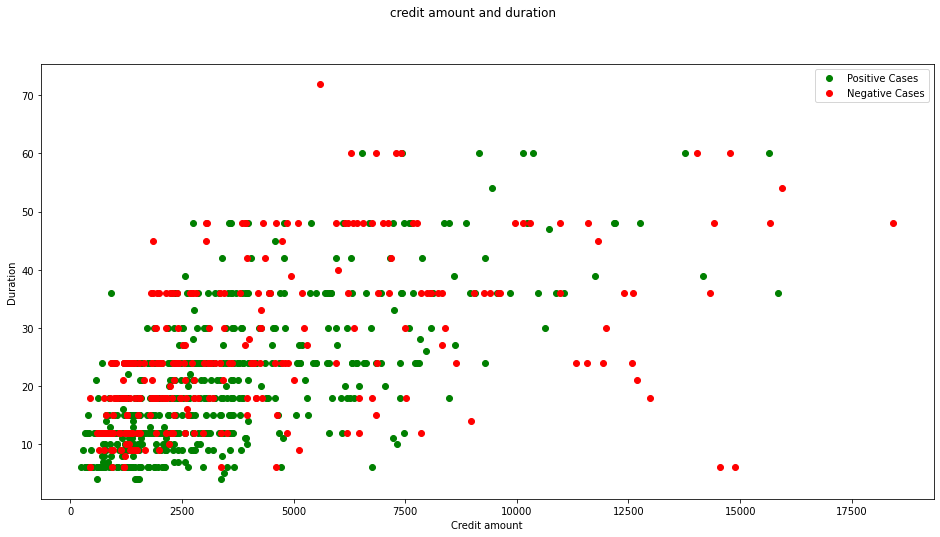

In [105]:
fig, ax = plt.subplots(figsize = (16, 8))
fig.suptitle('credit amount and duration')

pos_cases = data[data['credit_risk'] == 'good']
ax.scatter(pos_cases['amount'], pos_cases['duration'], c='g', label='Positive Cases')

neg_cases = data[data['credit_risk'] == 'bad']
ax.scatter(neg_cases['amount'], neg_cases['duration'], c='r', label='Negative Cases')
# хочу поделиться интересным фактом, который я заметил делая эту таску: если поменять 4-5 с 6-7 строками местами, то график будет немного иначе выглядеть, в том плане, что красные точки будут перекрыты 
# зелеными, а тут наоборот, зеленые перекрыты красными, зависит от порядка
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.legend()

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

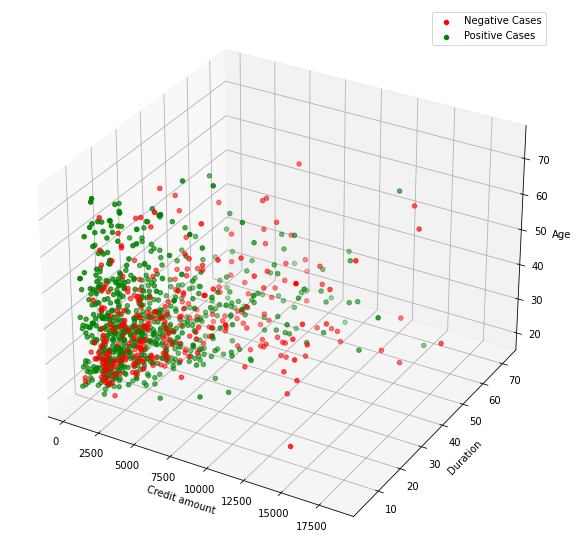

In [106]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

pos_cases = data[data['credit_risk'] == 'good']
neg_cases = data[data['credit_risk'] == 'bad']
ax.scatter(neg_cases['amount'], neg_cases['duration'], neg_cases['age'], c='r', label='Negative Cases')
ax.scatter(pos_cases['amount'], pos_cases['duration'], pos_cases['age'], c='g', label='Positive Cases')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

ax.legend()
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [107]:
# Бинарные: telephone,	foreign_worker,	credit_risk
# Порядковые: employment_duration, installment_rate, present_residence, number_credits, people_liable, status, savings
# Категориальные: credit_history, purpose, 	personal_status_sex, other_debtors, property, other_installment_plans	, housing, job
data = data.drop(['credit_history', 'purpose', 	'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], 1)
data['telephone'] = pd.factorize(data['telephone'])[0]
data['foreign_worker'] = pd.factorize(data['foreign_worker'])[0]
data['credit_risk'] = pd.factorize(data['credit_risk'])[0]

<ipython-input-107-9b8694b88c83>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['credit_history', 'purpose', 	'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], 1)


In [108]:
columns_toencode =  data[['employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable', 'status', 'savings']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(columns_toencode)

encoded_columns = enc.transform(columns_toencode)
data = pd.concat([data.drop(columns = columns_toencode.columns), pd.DataFrame(encoded_columns, columns = columns_toencode.columns)], axis = 1)
data

,duration,amount,age,telephone,foreign_worker,credit_risk,employment_duration,installment_rate,present_residence,number_credits,people_liable,status,savings
0,18,1049,21,0,0,0,2.0,2.0,3.0,0.0,0.0,3.0,4.0
1,9,2799,36,0,0,0,0.0,1.0,0.0,1.0,1.0,3.0,4.0
2,12,841,23,0,0,0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
3,12,2122,39,0,1,0,0.0,0.0,0.0,1.0,1.0,3.0,4.0
4,12,2171,38,0,1,0,0.0,2.0,3.0,1.0,0.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,0,0,1,0.0,1.0,3.0,0.0,1.0,3.0,4.0
996,24,2303,45,0,0,1,3.0,2.0,2.0,0.0,0.0,3.0,4.0
997,21,12680,30,1,0,1,3.0,2.0,3.0,0.0,0.0,1.0,1.0
998,12,6468,52,1,0,1,4.0,1.0,2.0,0.0,0.0,0.0,1.0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [192]:
def predict(Xtest: np.array) -> np.array:
    score = 2 * Xtest[:, 2] + 3 * Xtest[:, 1] - 3 * Xtest[:, 6] - 2 * Xtest[:, 7] + 2 * Xtest[:, 8] + 2 * Xtest[:, 9] + 2 * Xtest[:, 10]
    predictions = np.where(score >= 2000, 0, 1)
    return predictions
# очень много перепробовал вариантов и очень много проанализировал всего пока придумывал веса и тд, в итоге понял что это почти невозможно получить точность больше 0.66, что достигается просто выставлением 0 (у меня 0 это good) всем 
# если придумывать формулу самому, а не обучать модельку
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here

accuracy_score(y_test, predict(X_test))


<ipython-input-192-0dfc277a656b>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.652